In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#============================ load files ============================ 
inpath = '/MODIS/'
Tgs_fname = '//Tgs_halfdeg_01-15_PELT_Sept.npy'  # 🌟 corrected, see 'combine3file'
Topt_fname = inpath+'Topt_halfdeg_16d_2001_2015_recal2304.npy'

Tgs = np.load(Tgs_fname)
Topt = np.load(Topt_fname)
PFT = np.load(inpath+'LCtype_halfdeg_01_12_combined.npy')
veg_frac = np.load(inpath+'LCfrac_halfdeg_01_12_combined.npy')

In [46]:
# area stats

# find all vegetated pixels
ind1 = (PFT>0) & (PFT<=12)
ind2 = PFT==14
vegetated_px = veg_frac
vegetated_px[ ~(ind1 | ind2) ] = np.nan

# total vegetated area (weighted) - normalized
lats    = np.arange(89.75, -89.75-1E-6, -.5)
weights = np.cos(np.deg2rad(lats))
area_wg = vegetated_px * weights[:, None]
total_a = np.nansum(area_wg)

# mosaic area
PFT14   = np.nansum(area_wg[PFT==14])
print(PFT14, total_a, PFT14/total_a*100)  # %

# woody savana
print("frac(%) of woody savannas (PFT=8): ", np.nansum(area_wg[PFT==8]) / total_a * 100)

# savana
print("frac(%) of savannas (PFT=9): ", np.nansum(area_wg[PFT==9]) / total_a * 100)

# CSH
print("frac(%) of closed shrub (PFT=6): ", np.nansum(area_wg[PFT==6]) / total_a * 100)

# OSH
print("frac(%) of open shrub (PFT=7): ", np.nansum(area_wg[PFT==7]) / total_a * 100)

174997.64356365553 2465439.0463199904 7.098031639632858
frac(%) of woody savannas (PFT=8):  8.70007222026238
frac(%) of savannas (PFT=9):  9.608053244925392
frac(%) of closed shrub (PFT=6):  0.01232233791222403
frac(%) of open shrub (PFT=7):  19.38131786122912


In [ ]:
# pft considered
pft_name = ['ENF', 'EBF', 'DNF', 'DBF', 'MF',
        'SHR', 'SAV', 'GRA', 'WET', 'CRO']
pft_type = [1,2,3,4,5,7,9,10,11,12]
PFT = PFT[0:300,:]
veg_frac = veg_frac[:300,:]
PFT[PFT==6] = 7  # 合并OSH和CSH
PFT[PFT==8] = 9  # 合并WSA和SAV
Tgs = np.array([Tgs[i,j] if PFT[i,j] in pft_type else np.nan
            for i in range(300) for j in range(720)]).reshape(300,720)

# valid data
valid = np.logical_and(Tgs==Tgs, Topt==Topt, veg_frac>50.)
dict = {'Tgs':Tgs[valid].flatten(),
        'Topt':Topt[valid].flatten(),
        'PFT':PFT[valid].flatten()}
df = pd.DataFrame(dict)

# bin data in 5˚C intervals
df['Tgs_bin'] = (df['Tgs']//5*2+1)*5/2
df = df[(df['Tgs_bin']>0) & (df['Tgs_bin']<40)]

[Text(-0.5, 0, '0'),
 Text(0.5, 0, '5'),
 Text(1.5, 0, '10'),
 Text(2.5, 0, '15'),
 Text(3.5, 0, '20'),
 Text(4.5, 0, '25'),
 Text(5.5, 0, '30'),
 Text(6.5, 0, '35'),
 Text(7.5, 0, '40')]

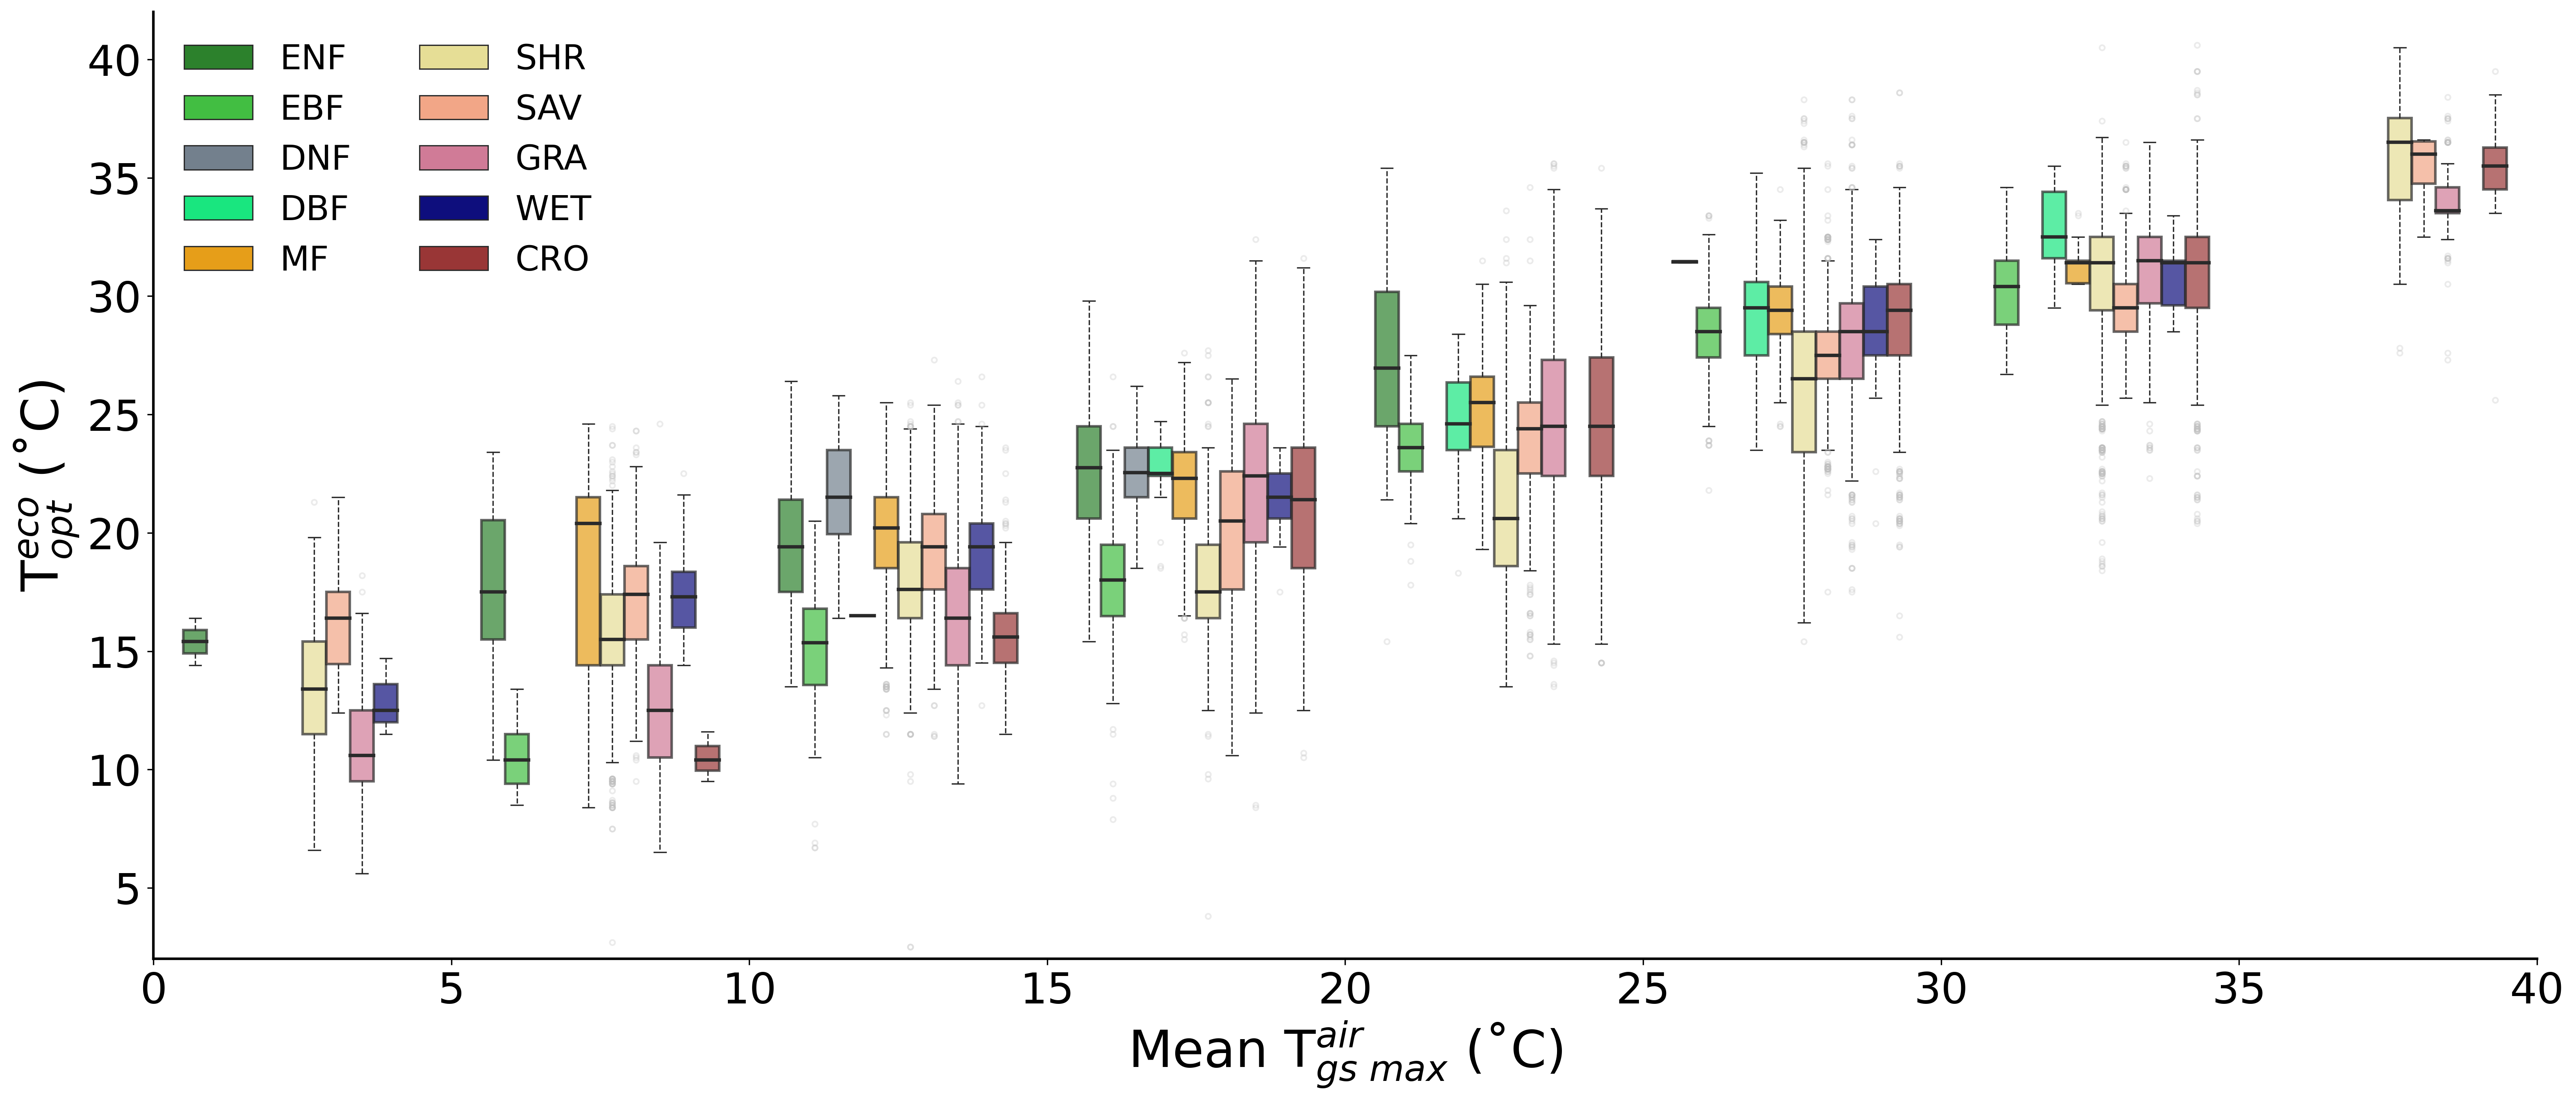

In [3]:
#============================== boxplot ==============================     
COLOR_TYPE = ['forestgreen', 'limegreen', 'slategrey','springgreen', 'orange', 'khaki',
                'lightsalmon', 'palevioletred', 'darkblue','brown']

fig, ax = plt.subplots(figsize=(25,10),
                        dpi=300)
ax = sns.boxplot(data=df, x="Tgs_bin", y="Topt", hue="PFT",
                palette=COLOR_TYPE,
                fliersize=1.,
                saturation=0.8,
                ax=ax,
                medianprops = {"linewidth": 2},
                whiskerprops = {"linestyle": 'dashed',
                                "lw": 0.8},
                flierprops = {"marker": "o",
                              "markersize": "3",
                              "mfc": 'None',
                              "mec": 'silver',
                              "alpha":.3},
                capprops = {"lw": 0.8},
                boxprops={"alpha": 0.7},
                )
ax.set_ylim((2,42))
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[:], pft_name,
                loc='upper left',
                ncol=2,
                frameon=False,
                markerscale=0.9,
                fontsize=20)
## See：https://cduvallet.github.io/posts/2018/03/boxplots-in-python

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Mean T$_{gs\\ max}^{air}$ (˚C)", fontsize=30)
ax.set_ylabel("T$_{opt}^{eco}$ (˚C)", fontsize=30)

xlabel = np.arange(0,40.5,5).astype(int)
locations = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
ax.set_xticks(locations)
ax.set_xticklabels(xlabel)